# ultimate Challenge



In [119]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import json


## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# read login df
login = pd.read_json("logins.json")
print(login.shape)
login.head()

(93142, 1)


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# convert to datetime and set index
login["login_time"] = pd.to_datetime(login["login_time"])
login = login.set_index("login_time")
login["count"] = 1

In [4]:
# resample the index and get 15min count
login15min = login.resample('15Min').sum().reset_index()
print(login15min.shape)
login15min.head(2)

(9788, 2)


,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6


C:\Users\yadav\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Login Counts per 15Min Interval')

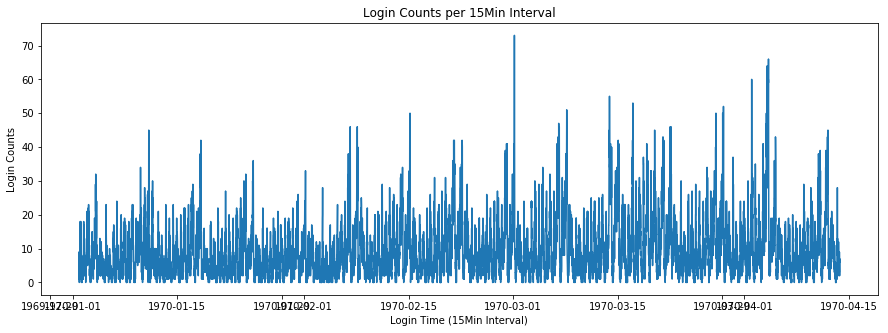

In [5]:
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.plot(login15min["login_time"],login15min["count"])
plt.xlabel('Login Time (15Min Interval)')
plt.ylabel('Login Counts')
plt.title("Login Counts per 15Min Interval")

Looks like login count pattern is like waves i.e. increasing slowly and then droping suddenly. Will extract year, month, day, hour, minute, seconds to analyse in detail

In [6]:
# reset index
login = login.reset_index().drop("count",axis=1)

In [133]:
login["date"] = [x.date() for x in login["login_time"]]
login["time"] = [x.time() for x in login["login_time"]]
login["year"] = [x.year for x in login["login_time"]]
login["month"] = [x.month for x in login["login_time"]]
login["day"] = [x.day for x in login["login_time"]]
login["hour"] = [x.hour for x in login["login_time"]]
login["minute"] = [x.minute for x in login["login_time"]]
login["second"] = [x.second for x in login["login_time"]]
login["dayOfWeek"] = [x.dayofweek for x in login["login_time"]]
login.head()

,login_time,date,time,year,month,day,hour,minute,second,dayOfWeek
0,1970-01-01 20:13:18,1970-01-01,20:13:18,1970,1,1,20,13,18,3
1,1970-01-01 20:16:10,1970-01-01,20:16:10,1970,1,1,20,16,10,3
2,1970-01-01 20:16:37,1970-01-01,20:16:37,1970,1,1,20,16,37,3
3,1970-01-01 20:16:36,1970-01-01,20:16:36,1970,1,1,20,16,36,3
4,1970-01-01 20:26:21,1970-01-01,20:26:21,1970,1,1,20,26,21,3


### Login Count Date Wise

Text(0.5, 1.0, 'Daily Login Count')

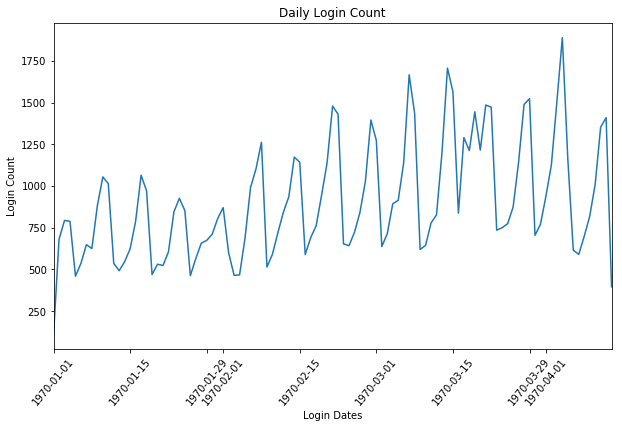

In [8]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plot = login["date"].value_counts().plot()
plt.xlabel("Login Dates")
plt.xticks(rotation=50)
plt.ylabel("Login Count")
plt.title("Daily Login Count")


In [49]:
loginDaily = pd.DataFrame(login.resample('D',on="login_time").size().reset_index()).rename(columns={0:"count"})
loginWkday = pd.DataFrame(login.resample('B',on="login_time").size().reset_index()).rename(columns={0:"count"})
loginFri = pd.DataFrame(login.resample('W-FRI',on="login_time").size().reset_index()).rename(columns={0:"count"})
loginSat = pd.DataFrame(login.resample('W-SAT',on="login_time").size().reset_index()).rename(columns={0:"count"})
loginSun = pd.DataFrame(login.resample('W-SUN',on="login_time").size().reset_index()).rename(columns={0:"count"})

Text(0.5, 1.0, 'Login pattern over time')

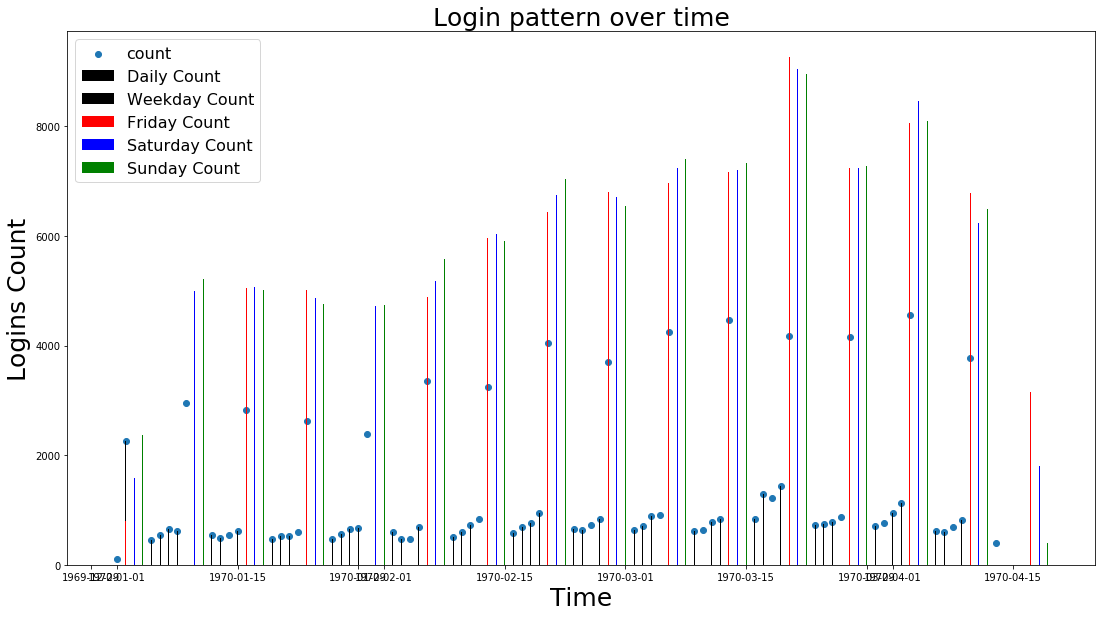

In [78]:
# plot these collected bins
plt.subplots(figsize = (15,8))
plt.tight_layout()
plt.bar(loginDaily["login_time"],loginDaily["count"],align="center",width=0.1,color="Black",label="Daily Count")
plt.bar(loginWkday["login_time"],loginWkday["count"],align="center",width=0.1,color="Black",label="Weekday Count")
plt.bar(loginFri["login_time"],loginFri["count"],align="center",width=0.1,color="R",label="Friday Count")
plt.bar(loginSat["login_time"],loginSat["count"],align="center",width=0.1,color="B",label="Saturday Count")
plt.bar(loginSun["login_time"],loginSun["count"],align="center",width=0.1,color="G",label="Sunday Count")
plt.scatter(loginWkday["login_time"],loginWkday["count"])

plt.legend(loc='upper left', fontsize = 16)
plt.xlabel("Time", fontsize = 25)
plt.ylabel("Logins Count", fontsize = 25)
plt.title("Login pattern over time", fontsize = 25)

### Above plot clearly indicates that there is high activity over Fridays, Saturday and Sundays as compared to other days of week.

In [141]:
daycount = login["dayOfWeek"].value_counts().sort_index().reset_index()
daycount.columns=["day","count"]
daycount["dayname"] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
daycount

,day,count,dayname
0,0,8823,Mon
1,1,9268,Tues
2,2,10339,Wed
3,3,11960,Thurs
4,4,15208,Fri
5,5,19377,Sat
6,6,18167,Sun


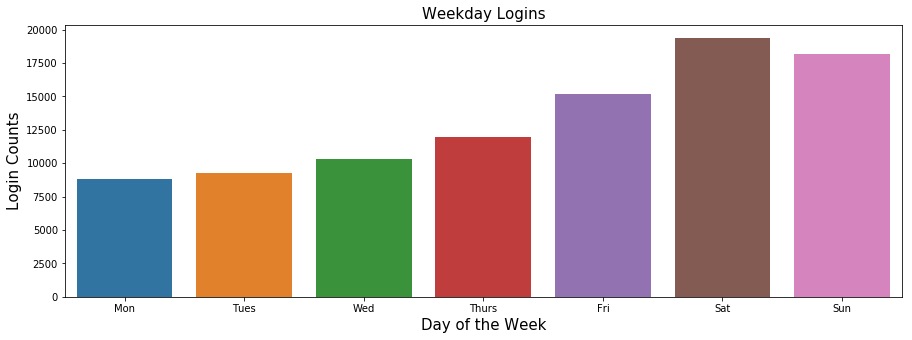

In [146]:
# plot day total logins
plt.figure(figsize=(15,5))
sns.barplot(x='dayname', y='count', data=daycount)
plt.xlabel('Day of the Week', fontsize = 15)
plt.title('Weekday Logins', fontsize = 15)
plt.ylabel('Login Counts', fontsize = 15)
plt.show()

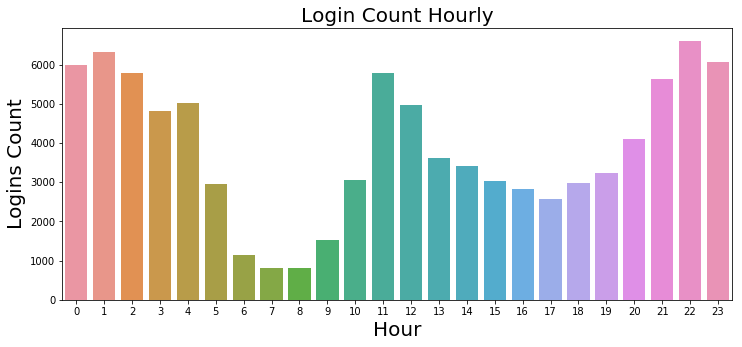

In [122]:
# hourly login pattern
loginHour = pd.DataFrame(login["hour"].value_counts().sort_index())

# plot it
plt.figure(figsize=(12,5))
#plt.bar(loginHour.index,loginHour["hour"],color="G",width=0.3)
sns.barplot(loginHour.index,loginHour["hour"])
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("Logins Count", fontsize = 20)
plt.title("Login Count Hourly", fontsize = 20)
plt.show()

### Most usage is from 9PM to 2AM. And very low usage between 6AM to 9AM. 

# Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would you choose profit as the key measure of success of this experiment in encouraging driver partners to serve both cities.
Weekend engagement is better than primary weekday city engagement for Gotham and Metropolis drivers. There is a huge difference in peak times during the weekdays, so it is unlikely that any driver would take advantage of both cities as that would associate to working more than 12 hours a day. However, with weekends being active for both throughout the day, it is more reasonable to expect a driver to take customers back and forth with tolls not being an issue.
I believe that creating these tolls roads will hopefully increase the awareness about the benefits of driver partners. The goal is to save time and increase productivity.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
We can perform an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time.
a. I will conduct a t-test as statistical test, with a p-value of 0.5.

b. There's three ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there.

c. In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

# Part 3 - Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.



In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from collections import defaultdict


In [130]:
#pd.read_json("ultimate_data_challenge.json")
with open("ultimate_data_challenge.json") as f:
    df = pd.DataFrame(json.load(f))
    
print(df.shape)
df.head()

(50000, 12)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [11]:
df.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [131]:
# convert bool to int
df["ultimate_black_user"]  = df["ultimate_black_user"].astype("int")

# convert dates to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])


In [134]:
df["last_trip_year"] = [x.year for x in df['last_trip_date']]
df["last_trip_mon"] = [x.month for x in df['last_trip_date']]
df["last_trip_day"] = [x.day for x in df['last_trip_date']]
df["signup_year"] = [x.year for x in df['signup_date']]
df["signup_month"] = [x.month for x in df['signup_date']]
df["signup_day"] = [x.day for x in df['signup_date']]


In [135]:
# get last 30 day period
maxDate = df['last_trip_date'].max()
day30toMaxDate = maxDate - datetime.timedelta(days=30)
print(maxDate," | ",day30toMaxDate)

2014-07-01 00:00:00  |  2014-06-01 00:00:00


In [136]:
# determine active status/users
df["active"] = (df['last_trip_date'] >= day30toMaxDate).astype('int')
df["active"].value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [137]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_year,last_trip_mon,last_trip_day,signup_year,signup_month,signup_day,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,2014,6,17,2014,1,25,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2014,5,5,2014,1,29,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,2014,1,7,2014,1,6,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,2014,6,29,2014,1,10,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,2014,3,15,2014,1,27,0


In [138]:
# Fixing null values
df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].mean(), inplace=True)
df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)
df['phone'].fillna('NA',inplace=True)

In [139]:
df.isna().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
last_trip_year            0
last_trip_mon             0
last_trip_day             0
signup_year               0
signup_month              0
signup_day                0
active                    0
dtype: int64

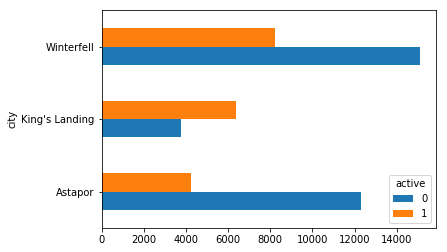

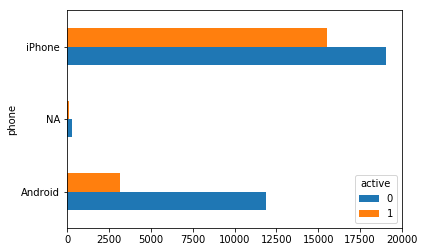

In [140]:
# active users vs city/phone
df.groupby("active")["city"].value_counts().unstack(0).plot(kind="barh")
df.groupby("active")["phone"].value_counts().unstack(0).plot(kind="barh")


In [141]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'last_trip_year', 'last_trip_mon', 'last_trip_day', 'signup_year',
       'signup_month', 'signup_day', 'active'],
      dtype='object')

In [142]:
df.drop(["last_trip_date","signup_date"],axis=1,inplace=True)

In [143]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_year,last_trip_mon,last_trip_day,signup_year,signup_month,signup_day,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,1,46.2,2014,6,17,2014,1,25,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,0,50.0,2014,5,5,2014,1,29,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,0,100.0,2014,1,7,2014,1,6,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,1,80.0,2014,6,29,2014,1,10,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,0,82.4,2014,3,15,2014,1,27,0


### Split, Label encoding and Scaling

In [145]:
#df_bkp = df.copy()
#df = df_bkp.copy()

In [146]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'last_trip_year', 'last_trip_mon',
       'last_trip_day', 'signup_year', 'signup_month', 'signup_day', 'active'],
      dtype='object')

In [147]:
x = df.drop("active",axis=1)
print(x.shape)
y = df["active"]
print(y.shape)

(50000, 16)
(50000,)


In [148]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
last_trip_year            50000 non-null int64
last_trip_mon             50000 non-null int64
last_trip_day             50000 non-null int64
signup_year               50000 non-null int64
signup_month              50000 non-null int64
signup_day                50000 non-null int64
dtypes: float64(6), int32(1), int64(7), object(2)
memory usage: 5.9+ MB


In [149]:
# select categorical columns so we can encode them. WIll merge them later on
#x.loc[:,x.dtypes == np.object]
catColumns = x.select_dtypes(object).columns.to_list()

# define label encoder & default dict(to reverse encode)
d = defaultdict(LabelEncoder)

# encode dataset
x[catColumns] = x[catColumns].apply(lambda x: d[x.name].fit_transform(x) )

# inverse the encode
#fit.apply(lambda x: d[x.name].inverse_transform(x) )
# using the dict to label future data
#df.apply(lambda x: d[x.name].transform(x) )


In [151]:
# -----------------------------
# min-max scaler
cols = x.columns.to_list()
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x),columns=cols)

In [153]:
x.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_year,last_trip_mon,last_trip_day,signup_year,signup_month,signup_day
0,0.022801,1.000,0.925,0.014286,0.5,1.0,0.154,0.032,1.0,0.462,0.0,0.833333,0.533333,0.0,0.0,0.800000
1,0.051317,1.000,1.000,0.000000,0.0,0.0,0.000,0.000,0.0,0.500,0.0,0.666667,0.133333,0.0,0.0,0.933333
2,0.004784,1.000,0.825,0.000000,0.0,1.0,0.000,0.024,0.0,1.000,0.0,0.000000,0.200000,0.0,0.0,0.166667
3,0.014662,0.975,0.900,0.020000,0.5,1.0,0.200,0.072,1.0,0.800,0.0,0.833333,0.933333,0.0,0.0,0.300000
4,0.019446,0.975,0.850,0.027143,1.0,0.0,0.118,0.112,0.0,0.824,0.0,0.333333,0.466667,0.0,0.0,0.866667


In [154]:
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)


In [160]:
# dataFrame to capture results of all classifiers
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


## Random Forest

In [155]:
#Create the model and check for best hyper-param

m = RandomForestClassifier(n_estimators=500, class_weight="balanced",random_state=13)

hyperparam_grid = {
    "n_estimators": [10, 50, 100, 500],
    "max_features": ["sqrt", "log2", 0.4, 0.5],
    "min_samples_leaf": [1, 3, 5],
    "criterion": ["gini", "entropy"]}

grid = GridSearchCV(m, hyperparam_grid, scoring="f1", cv=10, n_jobs=-1)

grid.fit(x, y)

#print("\033[1m" + "\033[0m" + "The best hyperparameters for {} data:".format(method))
for hyperparam in grid.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", grid.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((grid.best_score_) * 100))


riterion :  gini
ax_features :  sqrt
in_samples_leaf :  1
_estimators :  10
Best 10-folds CV f1-score: 100.00%.


In [161]:
rf = RandomForestClassifier(n_estimators=10, class_weight="balanced",random_state=13,
                          criterion='gini',max_features="sqrt",min_samples_leaf=1)

#m = RandomForestClassifier()
print(rf.fit(X_train,y_train))

#predict the results for test
test_pred = rf.predict(X_test)
#test the accuracy
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')

# capture preduction stats
yproba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
results = results.append({'classifiers':'Random Forest', 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
Accuracy Score: 1.0
Confusion Matrix: 
[[9391    0]
 [   0 5609]]


## Gradient Boosting

In [156]:
# Gradient Boosting classifier
gb = GradientBoostingClassifier(loss="deviance", random_state=123)
hyperparam_grid = {"max_features": ["log2", 0.5],
                   "n_estimators": [100, 300, 500],
                   "learning_rate": [0.001, 0.01, 0.1],
                   "max_depth": [1, 2, 3]}

grid = GridSearchCV(gb, param_grid=hyperparam_grid, scoring="f1", cv=10, n_jobs=-1)
#print(grid)
grid.fit(x,y)
#print(f"\033[1m\033[0mThe best hyperparameters:\n{'-' * 25}")
for hyperparam in grid.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", grid.best_params_[hyperparam])
print(f"\033[1m\033[94mBest 10-folds CV f1-score: {grid.best_score_ * 100:.2f}%.")


earning_rate :  0.001
ax_depth :  2
ax_features :  0.5
_estimators :  500
Best 10-folds CV f1-score: 100.00%.


In [162]:
gb = GradientBoostingClassifier(loss="deviance", random_state=123,
                               learning_rate=0.001,max_depth=2,max_features=0.5,n_estimators=500)

print(gb.fit(X_train,y_train))

#predict the results for test
test_pred = gb.predict(X_test)
#test the accuracy
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')

# capture preduction stats
yproba = gb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
results = results.append({'classifiers':'Gradient Boosting', 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=2,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy Score: 1.0
Confusion Matrix: 
[[9391    0]
 [   0 5609]]


## K-Nearest Neighbors

In [157]:
# KNN classifier
knn = KNeighborsClassifier()
hyperparam_range = range(1, 20)
grid = GridSearchCV(knn, param_grid={"n_neighbors": hyperparam_range,
                                  "weights": ["uniform", "distance"]},
                      scoring="f1", cv=10, n_jobs=-1 )
grid.fit(X_train, y_train)
print(f"\033[1m\033[0mThe best hyperparameters:\n{'-' * 25}")
for hyperparam in grid.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", grid.best_params_[hyperparam])
print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((grid.best_score_) * 100))


The best hyperparameters:
-------------------------
_neighbors :  4
eights :  distance
Best 10-folds CV f1-score: 96.76%.


In [163]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

print(knn.fit(X_train,y_train))

#predict the results for test
test_pred = knn.predict(X_test)
#test the accuracy
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')

# capture preduction stats
yproba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
results = results.append({'classifiers':'K Neighbors', 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
Accuracy Score: 0.9786
Confusion Matrix: 
[[9164  227]
 [  94 5515]]


## Logistic Regression

In [158]:
# logistic model classifier
lg = LogisticRegression(class_weight="balanced")
hyperparam_range = np.arange(0.5, 20.1, 0.5)
hyperparam_grid = {"penalty": ["l1", "l2"],
                   "C":  hyperparam_range,
                   "fit_intercept": [True, False] }
grid = GridSearchCV(lg,hyperparam_grid,scoring="accuracy", cv=2, n_jobs=-1)

grid.fit(x,y)

print(f"\033[1m\033[0mThe best hyperparameters:\n{'-' * 25}")
for hyperparam in grid.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", grid.best_params_[hyperparam])
print(f"\033[1m\033[94mBest 10-folds CV f1-score: {grid.best_score_ * 100:.2f}%.")


The best hyperparameters:
-------------------------
 :  0.5
it_intercept :  True
enalty :  l2
Best 10-folds CV f1-score: 100.00%.


In [164]:
lg = LogisticRegression(class_weight="balanced",C=0.5,penalty="l2",fit_intercept=True)

print(lg.fit(X_train,y_train))

#predict the results for test
test_pred = lg.predict(X_test)
#test the accuracy
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')

# capture preduction stats
yproba = lg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
results = results.append({'classifiers':'Logistic Regression', 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)


LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score: 1.0
Confusion Matrix: 
[[9391    0]
 [   0 5609]]


## Support Vector Machine (SVM)

In [159]:
# SVM classifier
svm = SVC(C=0.01,gamma=0.1, kernel="poly",degree=5, coef0=10,probability=True)
svm.fit(X_train, y_train)
svm_scores = cross_val_score(svm, X=x, y=y, scoring="f1", cv=10, n_jobs=-1)

# Print CV
print(f"\033[1m\033[94mThe 10-folds CV f1-score is: {np.mean(svm_scores) * 100:.2f}%")


The 10-folds CV f1-score is: 100.00%


In [165]:
svc = SVC(C=0.01,gamma=0.1, kernel="poly",degree=5, coef0=10,probability=True)

print(svc.fit(X_train,y_train))

#predict the results for test
test_pred = svc.predict(X_test)
#test the accuracy
print(f'Accuracy Score: {accuracy_score(y_test, test_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')

# capture preduction stats
yproba = svc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
results = results.append({'classifiers':'Support VC', 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Accuracy Score: 1.0
Confusion Matrix: 
[[9391    0]
 [   0 5609]]


### Plotting the ROC curve

In [166]:
# Set name of the classifiers as index labels
results.set_index('classifiers', inplace=True)
results

,fpr,tpr,auc
classifiers,,,
Random Forest,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000851879459056543...","[0.0, 0.9424139775361027, 0.9964343020146194, ...",1.000000
Gradient Boosting,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0067748261722232125, 0.022285612408628...",1.000000
K Neighbors,"[0.0, 0.004046427430518582, 0.0040464274305185...","[0.0, 0.8821536815831699, 0.9055090033874131, ...",0.995322
Logistic Regression,"[0.0, 0.0, 0.0, 0.9230113938877649, 0.92322436...","[0.0, 0.00017828489926903192, 1.0, 1.0, 1.0, 1.0]",1.000000
Support VC,"[0.0, 0.0, 0.0, 0.24459588968161006, 1.0]","[0.0, 0.02531645569620253, 1.0, 1.0, 1.0]",1.000000


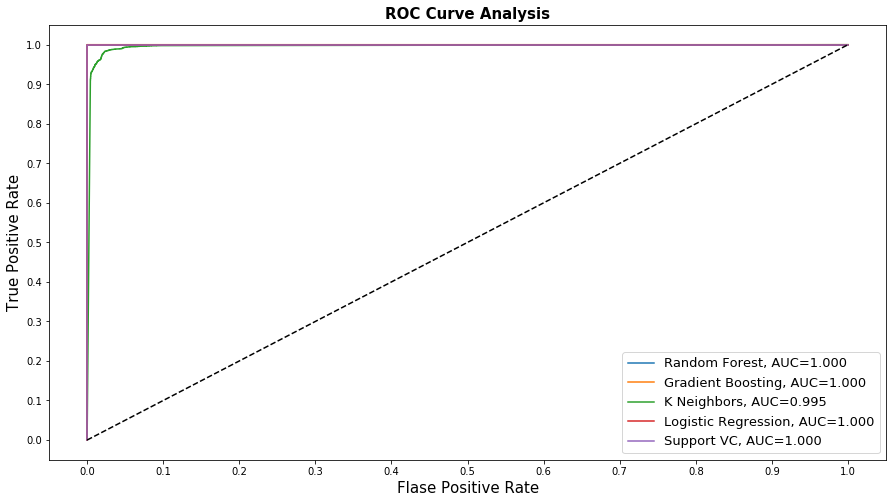

In [167]:
fig = plt.figure(figsize=(15,8))
for i in results.index:
    plt.plot(results.loc[i]['fpr'], results.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, results.loc[i]['auc']))
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

### Feature selection
We will use same approach as for prediction. Will selection feature importance/weight score for 3 top classifiers and will average it down. 

In [168]:
features = pd.DataFrame(columns=['lg','svc','rf','gb'])


In [169]:
features['lg'] = lg.coef_[0]
features['svc'] = svc.support_vectors_[0]
features['rf'] = rf.feature_importances_
features['gb'] = gb.feature_importances_


In [170]:
# scale the values of features
cols = features.columns.to_list()
scaler = MinMaxScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features),columns=cols)


In [172]:
features['imp'] = features[['lg','svc','rf','gb']].mean(axis=1)
features = features.set_index(x.columns)
features

,lg,svc,rf,gb,imp
avg_dist,0.000000,0.023298,0.003350,0.000000e+00,0.006662
avg_rating_by_driver,0.014989,0.000000,0.025073,3.895609e-02,0.019754
avg_rating_of_driver,0.019801,1.000000,0.001641,5.612157e-08,0.255361
avg_surge,0.019074,0.000000,0.022945,8.942888e-03,0.012741
city,0.025118,0.000000,0.003867,6.442770e-04,0.007407
phone,0.032885,1.000000,0.017786,2.362399e-03,0.263258
surge_pct,0.021607,0.000000,0.034196,2.010349e-02,0.018976
trips_in_first_30_days,0.058606,0.000000,0.004746,9.966296e-04,0.016087
ultimate_black_user,0.031557,0.000000,0.003181,2.440667e-04,0.008745
weekday_pct,0.014887,1.000000,0.013380,4.394411e-03,0.258166


Text(0.5, 1.0, 'Feature Importance to Attrition Prediction')

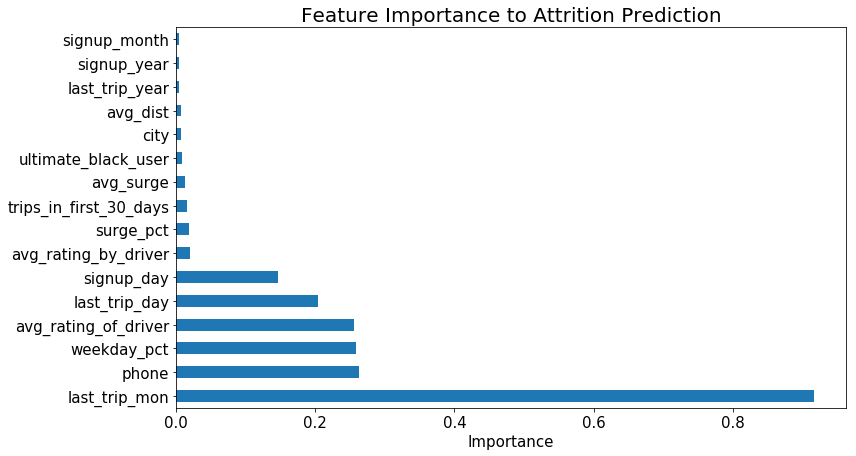

In [173]:
feat_importances = pd.Series(features['imp'], index=features.index)
feat_importances = feat_importances.nlargest(30)
barplot = feat_importances.plot(kind='barh',figsize=(12,7),legend=False,fontsize=15)
barplot.set_xlabel("Importance",fontsize=15)
#barplot.set_ylabel("Query Count(%)",fontsize=15)
barplot.set_title("Feature Importance to Attrition Prediction",fontsize=20)
